# MASTER PROJECT BY tedom noutchogouin donald

## Prediction of daily global solar radiation using different machine learning algorithms: Evaluation and comparison

### CASE OF CAMEROON

# **DATASET 1:  BAFOUSSAM FROM 1980 TO 2020**

# Modern-Era Retrospective Analysis for Research and Applications (MERRA), version 2
# Provider;National Aeronautics and Space Administration (NASA) / Goddard Space Flight Center
# More information at;http://gmao.gsfc.nasa.gov/reanalysis/MERRA-2
# Site latitude (positive means North);5.476
# Site longitude (positive means East);10.422
# Site altitude (m);1151
# Date beginning;1980-01-01
# Date end;2020-12-31
# Time reference (hour);UT
# Summarization (period of integration);Hour (h)
# Date - Instant;The date or instant given for each value corresponds to the end of the summarization

# Columns:
# Temperature (K);Temperature at 2 m above ground
# Relative humidity (%);Relative humidity at 2 m above ground
# Pressure (hPa);Pressure at ground level
# Wind speed (m/s);Wind speed at 10 m above ground
# Wind direction (deg);Wind direction at 10 m above ground (0 means from North, 90 from East...)
# Rainfall (kg/m2);Rainfall (= rain depth in mm)
# Snowfall (kg/m2);Snowfall
# Snow depth (m);Snow depth
# Short-wave irradiation (Wh/m2);Surface incoming shortwave irradiation (broadband)

# MERRA-2 meteorological data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [7]:
# Read the CSV file skipping the first 20 rows
df = pd.read_csv(r'C:\Users\ENG.TEDOM\Documents\master defend\dataset\Bafoussam_Hour_1980-01-01_2020-12-31_1242947587.csv', skiprows=24)

# Save the DataFrame to a new CSV file
df.to_csv('bafoussam.csv', index=False)

In [8]:
df = pd.read_csv('bafoussam.csv', sep=';', header=0)
# Rename the first column by removing the '#' character
df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,1980-01-01,01:00,289.12,77.86,893.24,1.75,351.21,0.0,0.0,0.0,0.0
1,1980-01-01,02:00,288.79,77.21,892.72,1.77,1.70,0.0,0.0,0.0,0.0
2,1980-01-01,03:00,288.55,75.90,892.57,1.80,15.39,0.0,0.0,0.0,0.0
3,1980-01-01,04:00,288.24,75.23,892.78,1.97,29.98,0.0,0.0,0.0,0.0
4,1980-01-01,05:00,287.85,75.50,893.20,2.20,40.09,0.0,0.0,0.0,0.0


## Check for null values in each column

In [9]:
# Check for null values in each column
null_columns = df.isna().any()

# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()

# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


## Convert a date column to numeric format using the ordinal date representation

In [10]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

# Check the updated DataFrame
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,01:00,289.12,77.86,893.24,1.75,351.21,0.0,0.0,0.0,0.0
1,722815,02:00,288.79,77.21,892.72,1.77,1.70,0.0,0.0,0.0,0.0
2,722815,03:00,288.55,75.90,892.57,1.80,15.39,0.0,0.0,0.0,0.0
3,722815,04:00,288.24,75.23,892.78,1.97,29.98,0.0,0.0,0.0,0.0
4,722815,05:00,287.85,75.50,893.20,2.20,40.09,0.0,0.0,0.0,0.0


## Convert UT time column to numeric format

In [11]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')

# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)

# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes

# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric

# Check the updated DataFrame
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,60,289.12,77.86,893.24,1.75,351.21,0.0,0.0,0.0,0.0
1,722815,120,288.79,77.21,892.72,1.77,1.70,0.0,0.0,0.0,0.0
2,722815,180,288.55,75.90,892.57,1.80,15.39,0.0,0.0,0.0,0.0
3,722815,240,288.24,75.23,892.78,1.97,29.98,0.0,0.0,0.0,0.0
4,722815,300,287.85,75.50,893.20,2.20,40.09,0.0,0.0,0.0,0.0


## Convert the column "Short-wave irradiation" from Wh/m² to MJ/m²

In [12]:
# Define the conversion factor
conversion_factor = 0.0000036  # 1 Wh/m² = 0.0000036 MJ/m²

# Convert the "short" column to MJ/m²
df['Short-wave irradiation'] = df['Short-wave irradiation'] * conversion_factor

# Optionally, drop the original "short" column
# df.drop(columns=['short'], inplace=True)

df.head()


,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,60,289.12,77.86,893.24,1.75,351.21,0.0,0.0,0.0,0.0
1,722815,120,288.79,77.21,892.72,1.77,1.70,0.0,0.0,0.0,0.0
2,722815,180,288.55,75.90,892.57,1.80,15.39,0.0,0.0,0.0,0.0
3,722815,240,288.24,75.23,892.78,1.97,29.98,0.0,0.0,0.0,0.0
4,722815,300,287.85,75.50,893.20,2.20,40.09,0.0,0.0,0.0,0.0


## Feature selection or feature engineering

In [13]:
column_list = df.columns.tolist()
column_list

['Date',
 'UT time',
 'Temperature',
 'Relative Humidity',
 'Pressure',
 'Wind speed',
 'Wind direction',
 'Rainfall',
 'Snowfall',
 'Snow depth',
 'Short-wave irradiation']

## Let remove Snowfall and snow depth because there are empty

In [14]:
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                      ])


## Let Find the correlation Matrix

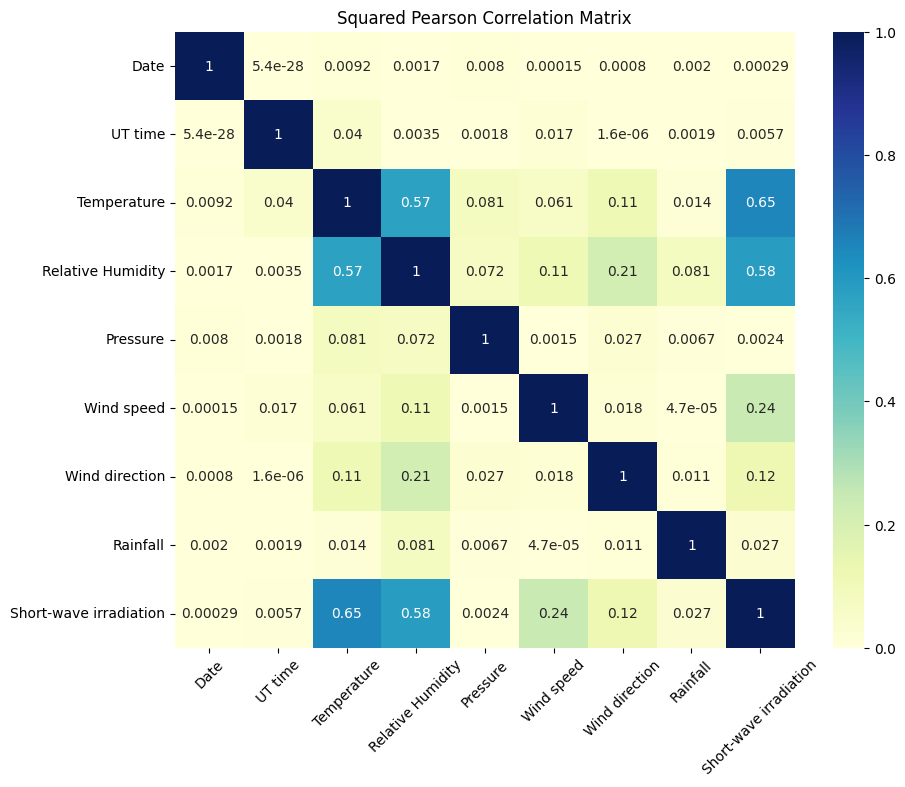

In [15]:
import seaborn as sns

# Compute correlation matrix using Pearson correlation method
corr_matrix = df.corr(method='pearson') ** 2  # Square each correlation coefficient

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1)

# Set the feature names as labels for both axes
plt.xticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=0)

plt.title("Squared Pearson Correlation Matrix")
plt.show()

## With this correlation matrix we can noticed that temperation, wind speed and relative humidity have a correlation coefficient greather than 0.2 to the Short-wave irradiation

In [16]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'UT time',
                      'Pressure',
                      'Wind direction',
                      'Rainfall'
                      ])

# Check the updated DataFrame
df.head()

,Temperature,Relative Humidity,Wind speed,Short-wave irradiation
0,289.12,77.86,1.75,0.0
1,288.79,77.21,1.77,0.0
2,288.55,75.90,1.80,0.0
3,288.24,75.23,1.97,0.0
4,287.85,75.50,2.20,0.0


##  TRAIN, VALIDATION, TEST DATASETS

In [96]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

## SCALE DATASET AND OVER SAMPLE IT

In [97]:
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

In [98]:
train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)

## EVALUATION MATRIX FUNCTION

In [99]:
def evaluate_model(predictions, test_X_scaled, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)

    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))

    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)

    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)

    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))

    # Calculate t-statistic
    t_stat_rf = mbe_rf / (rmse_rf / np.sqrt(len(test_y)))

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 't-statistic'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, t_stat_rf]
    })

    # Print the evaluation table
    print(title)

    # Return the evaluation table
    return evaluation_table

## Actual vs. Predicted Short-wave irradiation MJ/m2

In [100]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    """
    Plot actual vs. predicted values and error curve.

    Args:
    - test_y (array-like): Array of actual values.
    - predictions (array-like): Array of predicted values.
    - label (str): Label for the predicted values.
    - sample_size (int): Number of samples to plot.

    Returns:
    - None
    """

    # Calculate error curve
    error_curve = test_y - predictions

    # Set figure size
    plt.figure(figsize=(20, 6))

    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Short-wave irradiation MJ/m2')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions)))  # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0

    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error MJ/m2')
    plt.ylim(bottom=min(error_curve), top=max(error_curve))  # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


##  LINEAR REGRESSION

In [101]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(train_X_scaled, train_y)
# Predict on the test set
predictions_reg = linear_reg.predict(test_X_scaled)

# Evaluation
evaluate_model(predictions_reg, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for Milti Linear Regression Models")

Bafoussam Metrics Evaluation for Milti Linear Regression Models


,Metric,Value
0,R²,0.771233
1,RMSE,0.000470
2,rRMSE,0.478296
3,MBE,0.000002
4,MABE,0.000349
5,t-statistic,1.334061


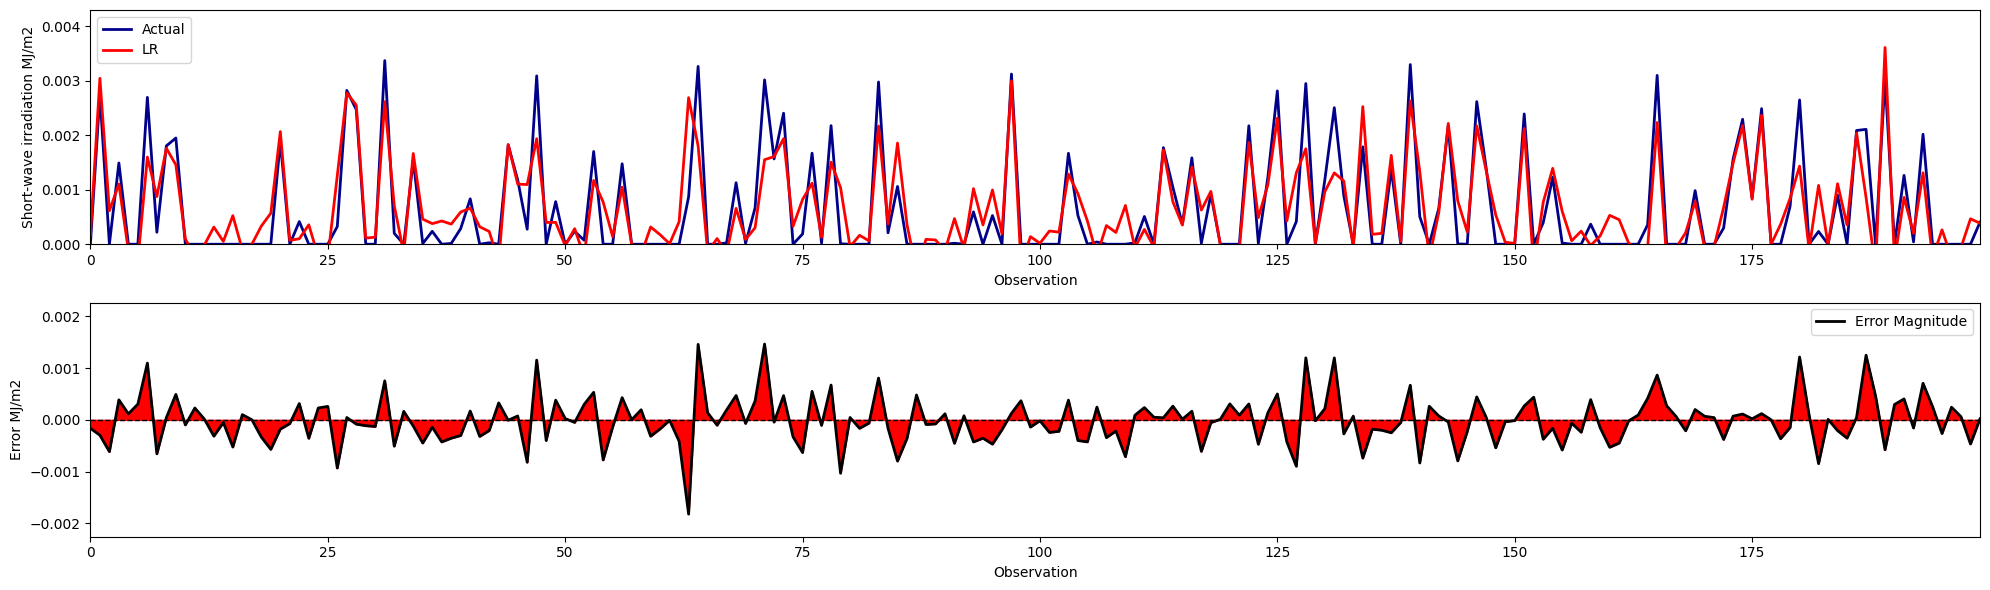

In [102]:
plot_actual_vs_predicted(test_y, predictions_reg, label='LR')

## DECISION TREE MODEL

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=1000)

# Train the model
model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_dt = model.predict(test_X_scaled)

# Evaluate the model
mse = mean_squared_error(test_y, predictions_dt)
mae = mean_absolute_error(test_y, predictions_dt)
r2 = r2_score(test_y, predictions_dt)

evaluate_model(predictions_dt, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for Decision Tree Models")

Bafoussam Metrics Evaluation for Decision Tree Models


,Metric,Value
0,R²,0.664087
1,RMSE,0.000569
2,rRMSE,0.579580
3,MBE,0.000004
4,MABE,0.000320
5,t-statistic,1.768164


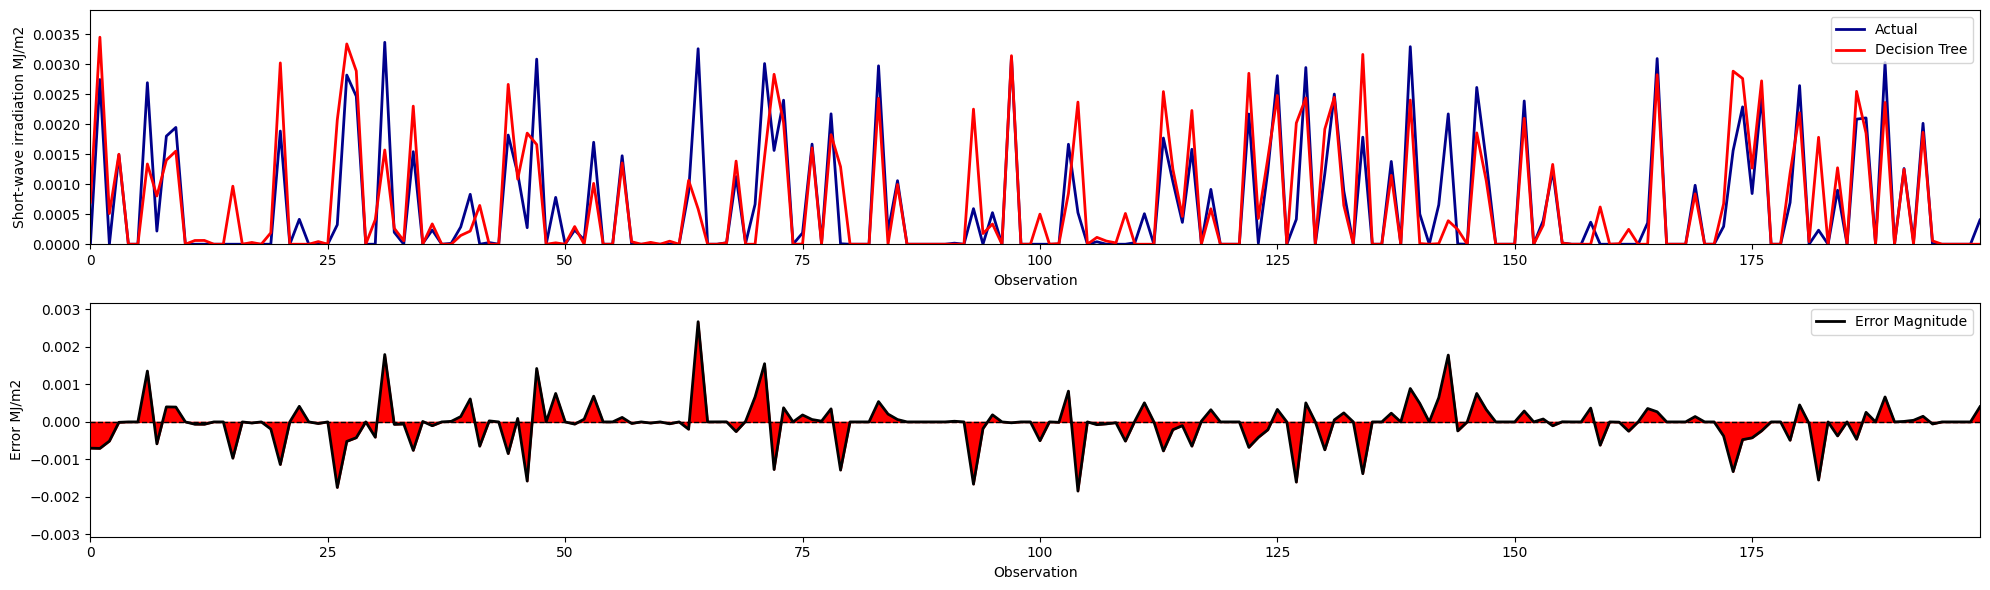

In [104]:
plot_actual_vs_predicted(test_y, predictions_dt, label='Decision Tree')

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model
model_rf = RandomForestRegressor(random_state=10)

# Train the model
model_rf.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_rf= model_rf.predict(test_X_scaled)



evaluate_model(predictions_rf, test_X_scaled, test_y,"Bafoussam Metrics Evaluation for Random Forest Models")

Bafoussam Metrics Evaluation for Random Forest Models


,Metric,Value
0,R²,0.817890
1,RMSE,0.000419
2,rRMSE,0.426743
3,MBE,0.000004
4,MABE,0.000250
5,t-statistic,2.523122


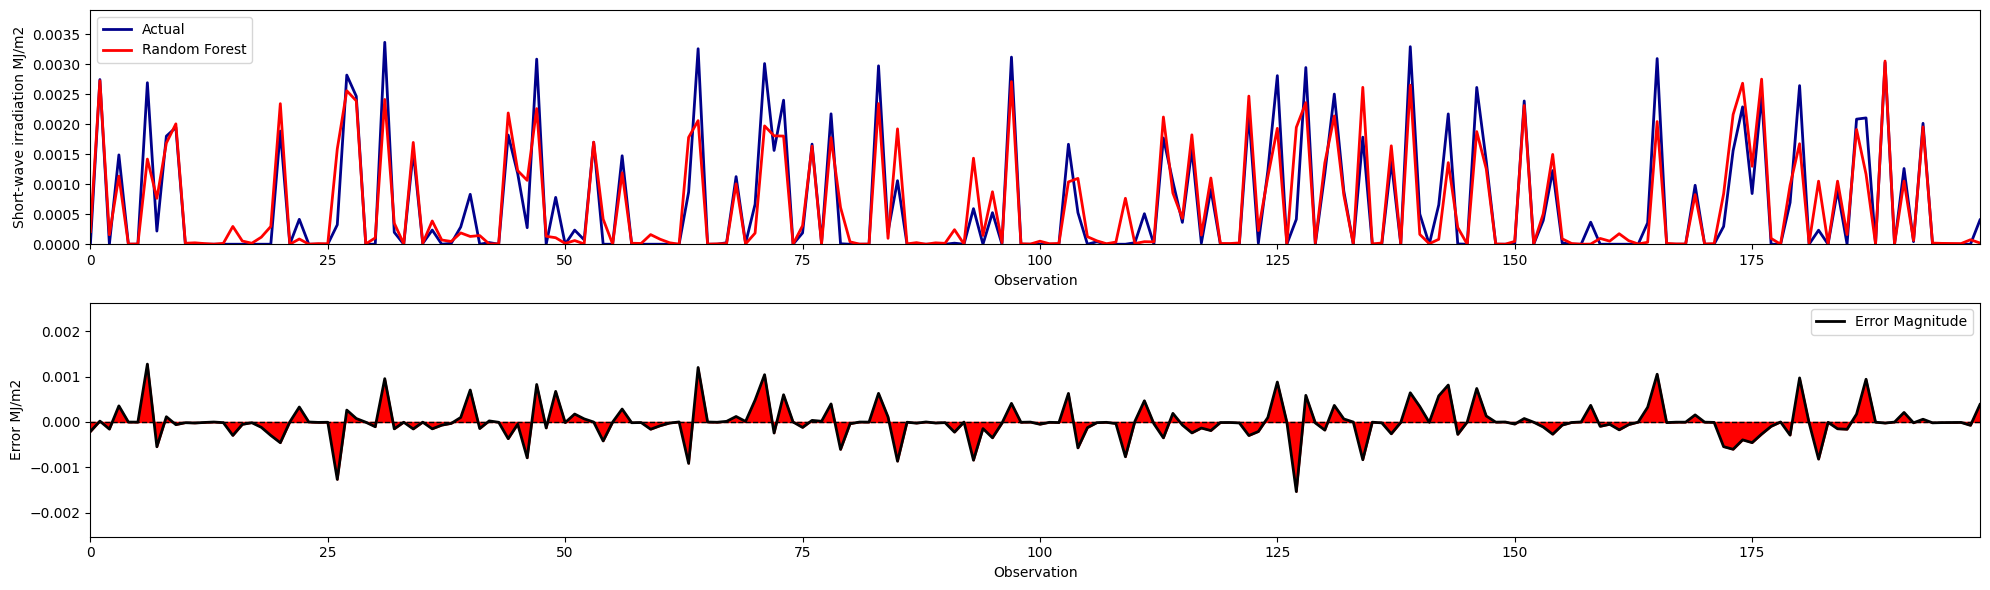

In [106]:
plot_actual_vs_predicted(test_y, predictions_rf, label='Random Forest')

## Gradient Boosting Machine (GBM)

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)

# Train the model
model_gbm.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_gbm, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for Gradient Booting Machine Models")

Bafoussam Metrics Evaluation for Gradient Booting Machine Models


,Metric,Value
0,R²,0.825917
1,RMSE,0.000410
2,rRMSE,0.417232
3,MBE,0.000001
4,MABE,0.000259
5,t-statistic,0.893300


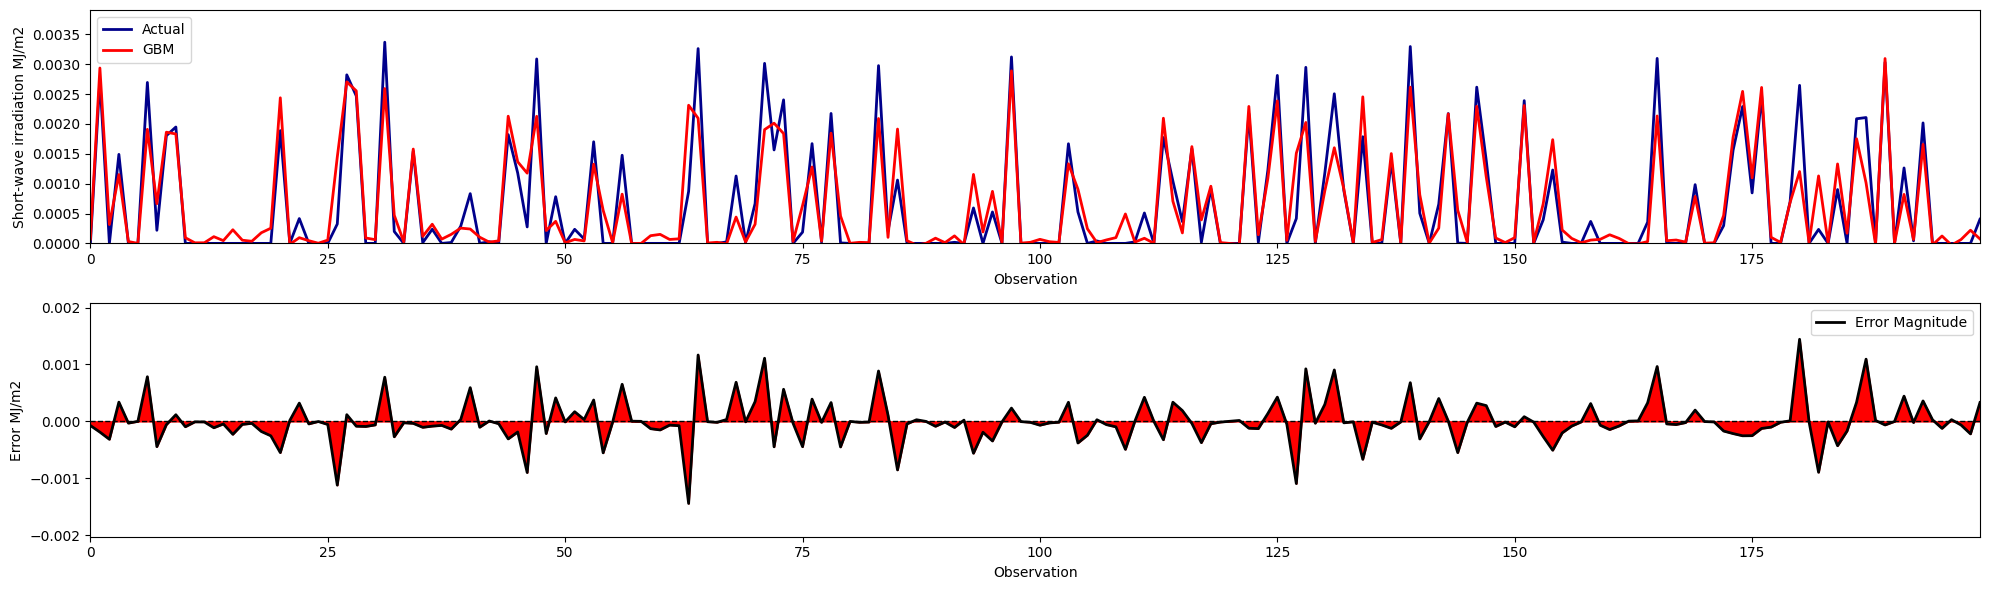

In [108]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')

## KNN

In [109]:
from sklearn.neighbors import KNeighborsRegressor

# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
model_knn.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_knn, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for k-Nearest Neighbors Model (k=5)")

Bafoussam Metrics Evaluation for k-Nearest Neighbors Model (k=5)


,Metric,Value
0,R²,0.805155
1,RMSE,0.000433
2,rRMSE,0.441412
3,MBE,0.000003
4,MABE,0.000254
5,t-statistic,2.092089


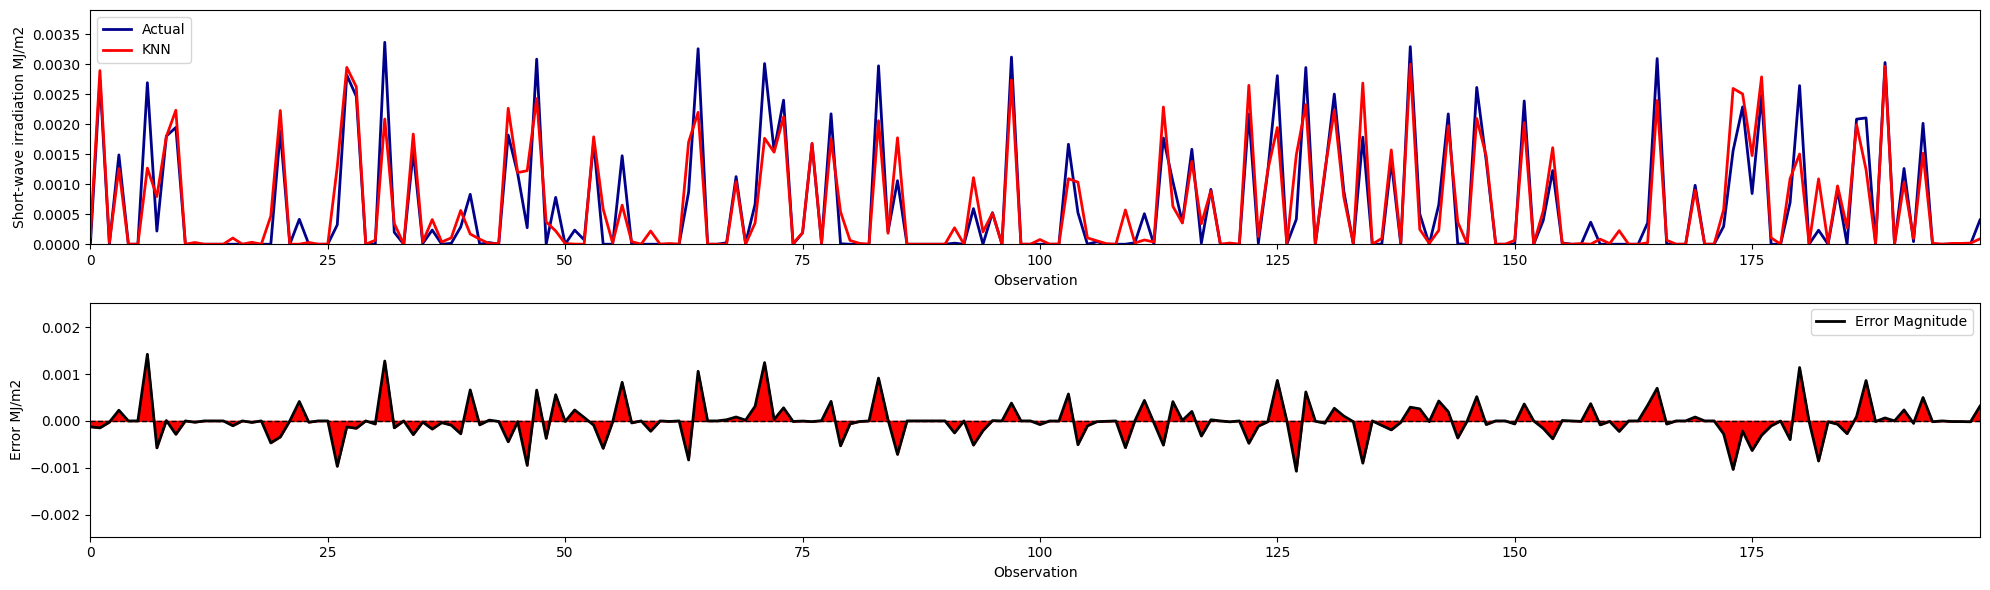

In [110]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')

## LSTM NETWORK (Long Short Term Memory)

In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)

# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)

# Flatten predictions
predictions_lstm = predictions_lstm.flatten()

# Evaluate the model
evaluate_model(predictions_lstm, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for LSTM Model")

2247/2247 [==============================] - 5s 2ms/step
Bafoussam Metrics Evaluation for LSTM Model


,Metric,Value
0,R²,0.804457
1,RMSE,0.000434
2,rRMSE,0.442202
3,MBE,0.000123
4,MABE,0.000298
5,t-statistic,76.161672


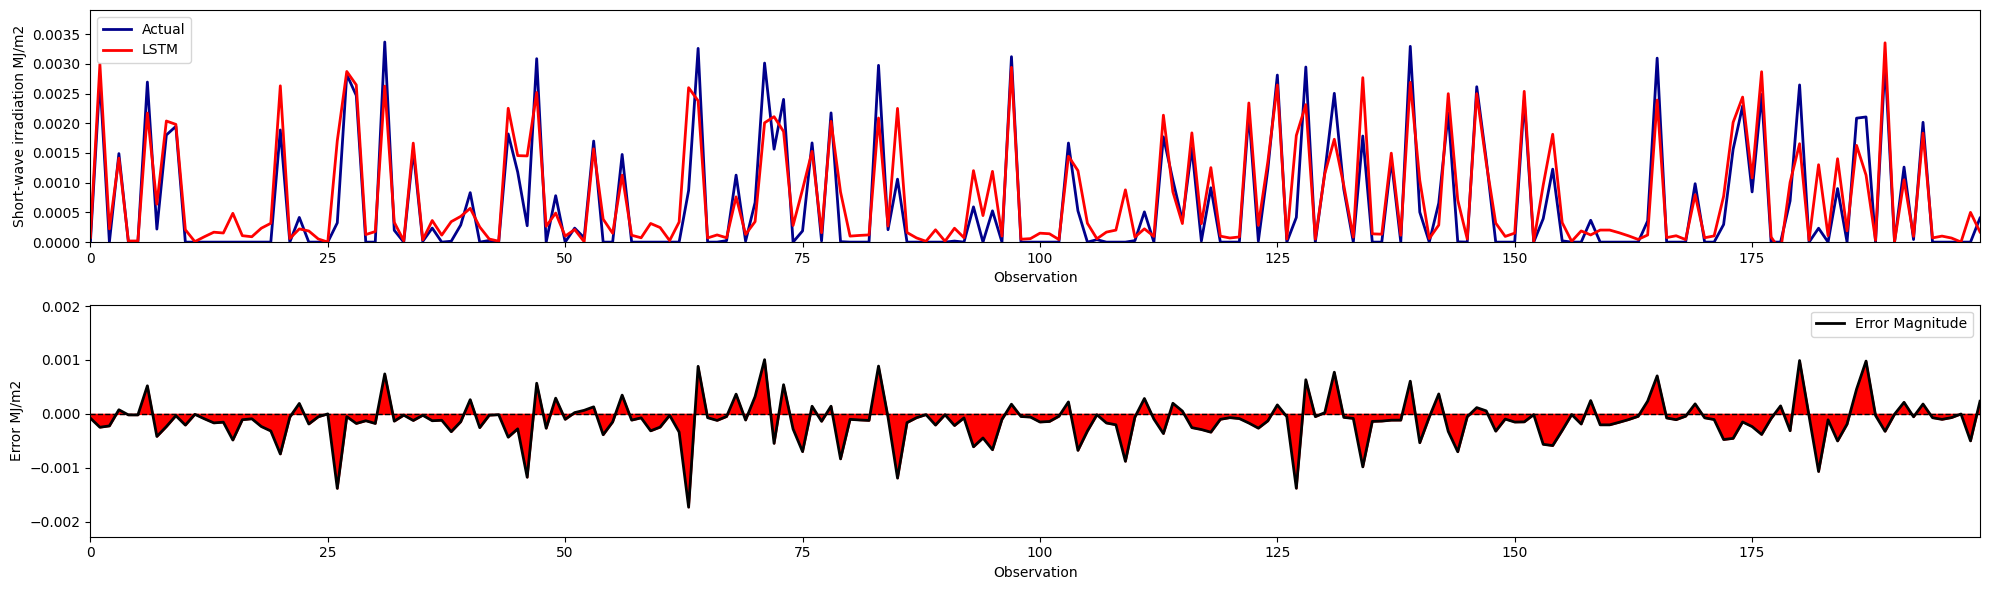

In [112]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')

## SVM(Support Vector Machine)

In [115]:
from sklearn.svm import SVR

# Create and train the linear SVR model
svr_poly = SVR(kernel='linear')
svr_poly.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_svm = svr_poly.predict(test_X_scaled)

evaluate_model(predictions_svm, test_X_scaled, test_y, "Bafoussam Metrics Evaluation for Svm Model")

Bafoussam Metrics Evaluation for Svm Model


,Metric,Value
0,R²,-1.611044
1,RMSE,0.001587
2,rRMSE,1.615872
3,MBE,0.001246
4,MABE,0.001451
5,t-statistic,210.603573


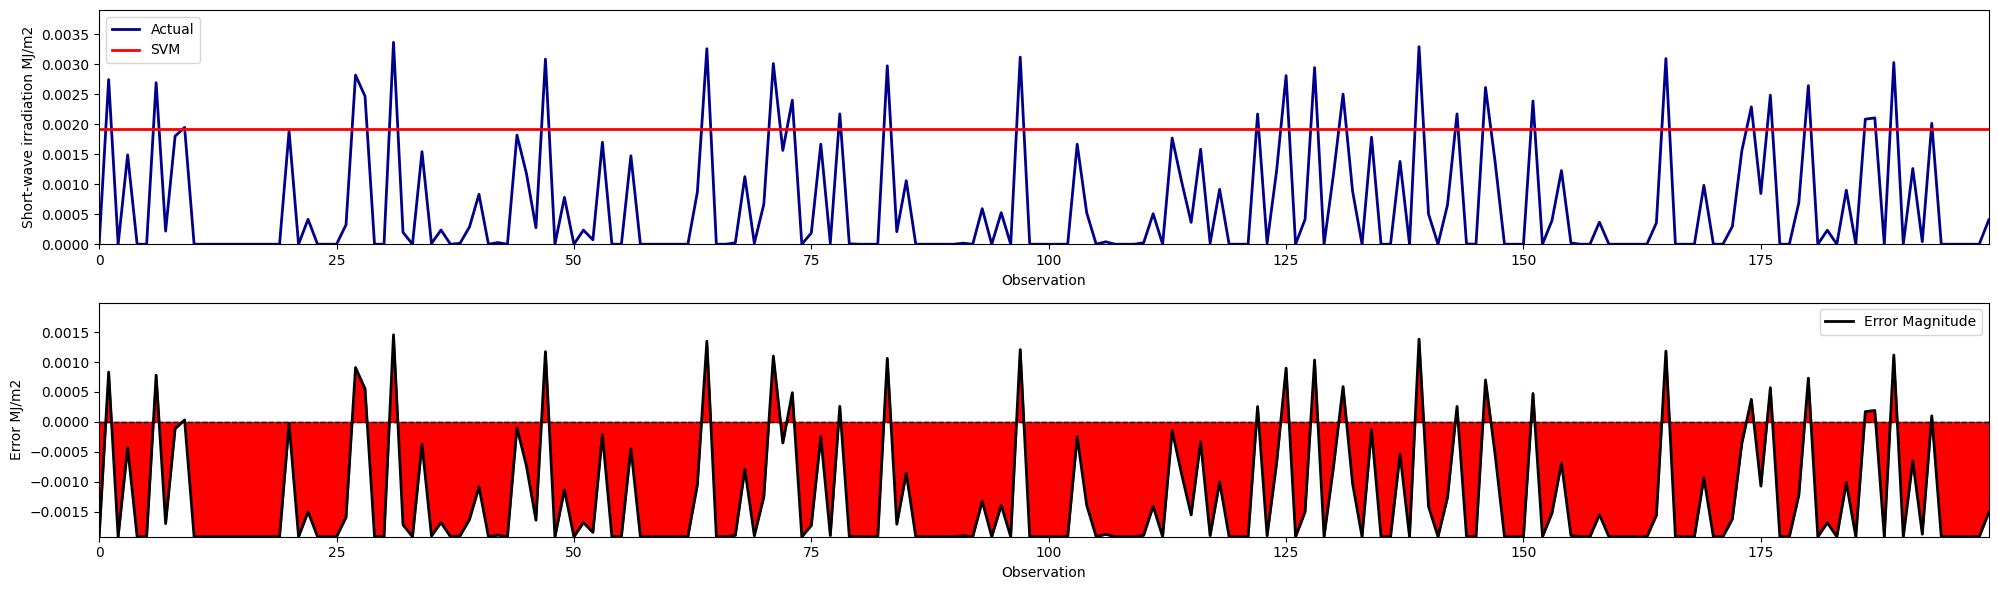

In [116]:
plot_actual_vs_predicted(test_y, predictions_poly, label='SVM')

## ANN

In [117]:
from sklearn.neural_network import MLPRegressor

# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Train the ANN model
model_ann.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_ann, test_X_scaled, test_y, "ANN Metrics Evaluation")

ANN Metrics Evaluation


,Metric,Value
0,R²,0.543561
1,RMSE,0.000663
2,rRMSE,0.675602
3,MBE,0.000285
4,MABE,0.000477
5,t-statistic,115.364405


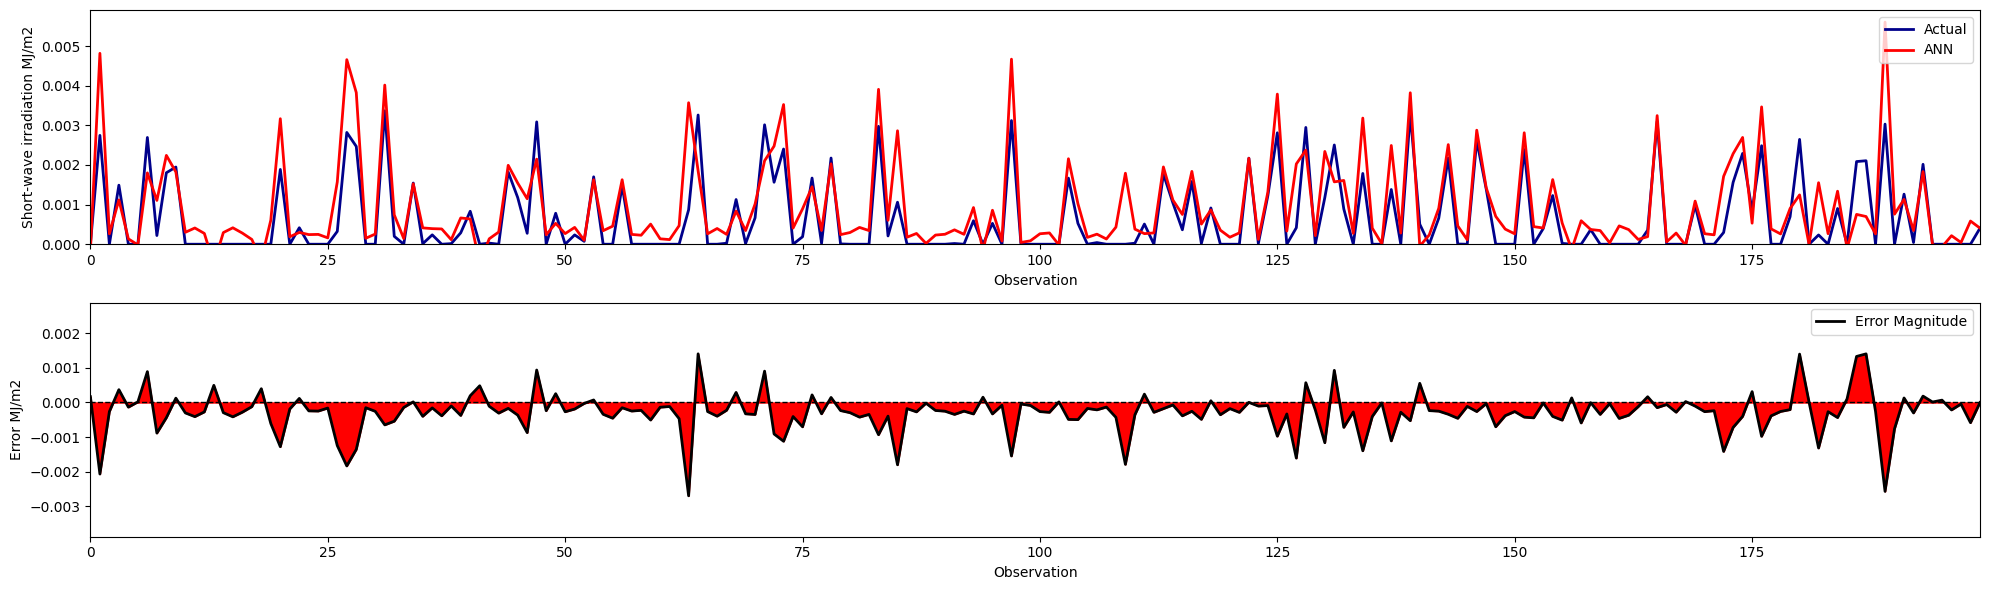

In [118]:
plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')

In [119]:
def evaluate_model(predictions, test_X_scaled, test_y, title, batch_size=1000):
    # Calculate RMSE in batches
    rmse_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
    rmse = np.mean(rmse_batches)
    
    # Calculate MBE and MABE in batches
    mbe_batches = []
    mabe_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
    
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    
    # Calculate other metrics similarly as before
    rrmse = rmse / np.mean(test_y)
    rrmse_rf = rmse / np.std(test_y)
    
    # Print or return the metrics
    print(title)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Relative RMSE (RRMSE):", rrmse)
    print("Relative RMSE with respect to standard deviation (RRMSE-RF):", rrmse_rf)
    print("Mean Bias Error (MBE):", mbe_rf)
    print("Mean Absolute Bias Error (MABE):", mabe_rf)


## DL (Deep learning)

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    """
    Plot actual vs. predicted values and error curve.

    Args:
    - test_y (array-like): Array of actual values.
    - predictions (array-like): Array of predicted values.
    - label (str): Label for the predicted values.
    - sample_size (int): Number of samples to plot.

    Returns:
    - None
    """

    # Initialize error curve array
    error_curve = np.zeros_like(test_y)

    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten()  # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions

    # Set figure size
    plt.figure(figsize=(20, 6))

    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Short-wave irradiation MJ/m2')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions)))  # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0

    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error MJ/m2')
    plt.ylim(bottom=min(error_curve), top=max(error_curve))  # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluate_model(predictions_dl, test_X_scaled, test_y, "Deep Learning (DL) Metrics Evaluation")


Epoch 1/5
21566/21566 [==============================] - 47s 2ms/step - loss: 9.4212e-05 - root_mean_squared_error: 0.0097 - r_squared: -185.3523 - val_loss: 2.3233e-07 - val_root_mean_squared_error: 4.8201e-04 - val_r_squared: 0.6376
Epoch 2/5
21566/21566 [==============================] - 45s 2ms/step - loss: 2.5938e-07 - root_mean_squared_error: 5.0929e-04 - r_squared: 0.4478 - val_loss: 1.7797e-07 - val_root_mean_squared_error: 4.2186e-04 - val_r_squared: 0.6439
Epoch 3/5
21566/21566 [==============================] - 48s 2ms/step - loss: 2.3743e-07 - root_mean_squared_error: 4.8726e-04 - r_squared: 0.4773 - val_loss: 2.9359e-07 - val_root_mean_squared_error: 5.4184e-04 - val_r_squared: 0.2181
Epoch 4/5
21566/21566 [==============================] - 46s 2ms/step - loss: 2.3498e-07 - root_mean_squared_error: 4.8475e-04 - r_squared: 0.4983 - val_loss: 3.4077e-07 - val_root_mean_squared_error: 5.8376e-04 - val_r_squared: 0.3191
Epoch 5/5
2247/2247 [==============================] - 3s

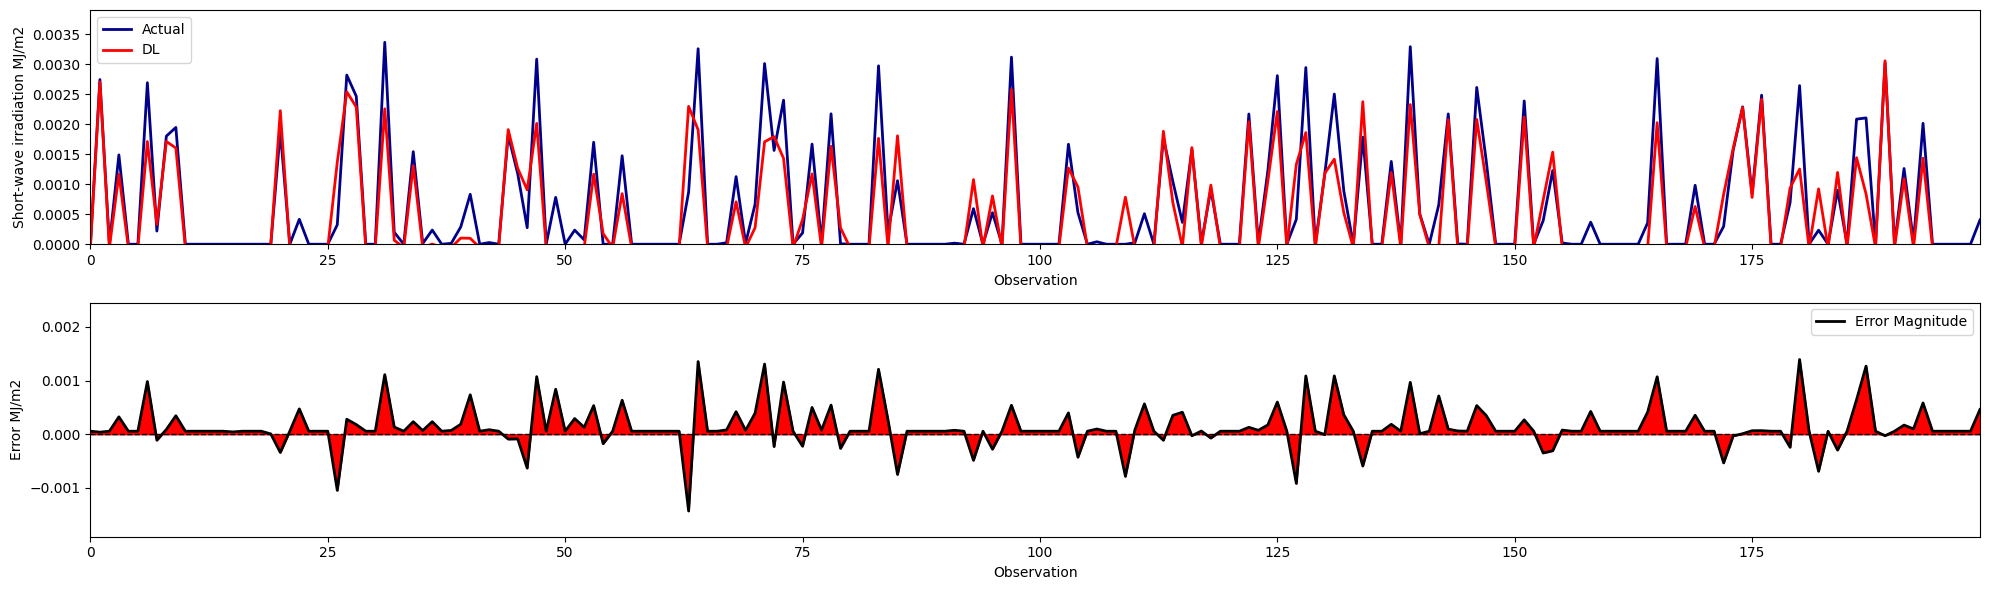

In [122]:
plot_actual_vs_predicted(test_y, predictions_dl, label='DL')

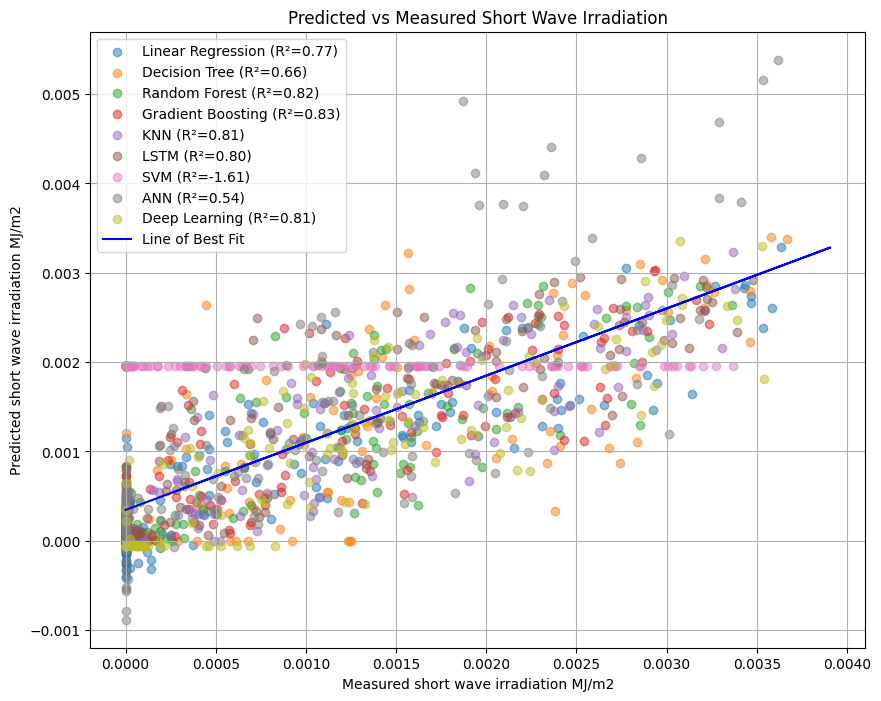

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model
def plot_predictions(test_y, predictions, model_name, sample_size=200):
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten()
    predictions_sample = predictions[sample_indices].flatten()

    # Calculate R^2 score
    r2 = r2_score(test_y, predictions)

    # Plot scatter plot
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5)

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_reg.flatten(),
    predictions_dt.flatten(),
    predictions_rf.flatten(),
    predictions_gbm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_svm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten()
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = np.tile(test_y.flatten(), 9)

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions, 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 8))

# Plot scatter plot for each model
plot_predictions(test_y, predictions_reg, 'Linear Regression')
plot_predictions(test_y, predictions_dt, 'Decision Tree')
plot_predictions(test_y, predictions_rf, 'Random Forest')
plot_predictions(test_y, predictions_gbm, 'Gradient Boosting')
plot_predictions(test_y, predictions_knn, 'KNN')
plot_predictions(test_y, predictions_lstm, 'LSTM')
plot_predictions(test_y, predictions_svm, 'SVM')
plot_predictions(test_y, predictions_ann, 'ANN')
plot_predictions(test_y, predictions_dl, 'Deep Learning')

# Plot line of best fit for all predictions in blue
plt.plot(test_y, p(test_y.flatten()), color='blue', label='Line of Best Fit')

# Plot settings
plt.xlabel('Measured short wave irradiation MJ/m2')
plt.ylabel('Predicted short wave irradiation MJ/m2')
plt.title('Predicted vs Measured Short Wave Irradiation')
plt.legend()
plt.grid(True)
plt.show()
